In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [65]:
os.listdir('.')
# os.chdir('drive/My Drive/Colab_Test/Dataset/Clustering')

['iris.csv', 'customer.csv']

In [66]:
dataset = pd.read_csv('customer.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
genre_categorized =  pd.get_dummies(dataset['Genre'])

genre_categorized

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [68]:
dataset = pd.concat([dataset, genre_categorized], axis=1)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Female                  200 non-null    uint8 
 6   Male                    200 non-null    uint8 
dtypes: int64(4), object(1), uint8(2)
memory usage: 8.3+ KB


In [70]:
dataset.drop(['CustomerID', 'Genre'], axis = 1, inplace=True)
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [71]:
from sklearn.cluster import KMeans

In [72]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state= 10 )
  kmeans.fit(dataset)
  wcss.append(kmeans.inertia_)

print(wcss)

[308911.34, 212938.7150895141, 143440.43314900761, 104463.19922884135, 75448.45165554191, 58396.839405039405, 51213.38152958153, 44734.44301948052, 41364.5424301505, 37145.52735980328]


Text(0, 0.5, 'Inertia')

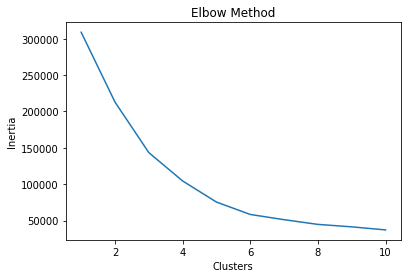

In [73]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

In [74]:
kmeans = KMeans(n_clusters=6, random_state=10)
model = kmeans.fit(dataset)

In [75]:
model.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 0,
       3, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [76]:
model.cluster_centers_

array([[27.        , 56.65789474, 49.13157895,  0.65789474,  0.34210526],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [41.68571429, 88.22857143, 17.28571429,  0.42857143,  0.57142857],
       [44.14285714, 25.14285714, 19.52380952,  0.61904762,  0.38095238],
       [25.27272727, 25.72727273, 79.36363636,  0.59090909,  0.40909091],
       [56.15555556, 53.37777778, 49.08888889,  0.55555556,  0.44444444]])

In [77]:
y_kmeans = kmeans.predict(dataset)

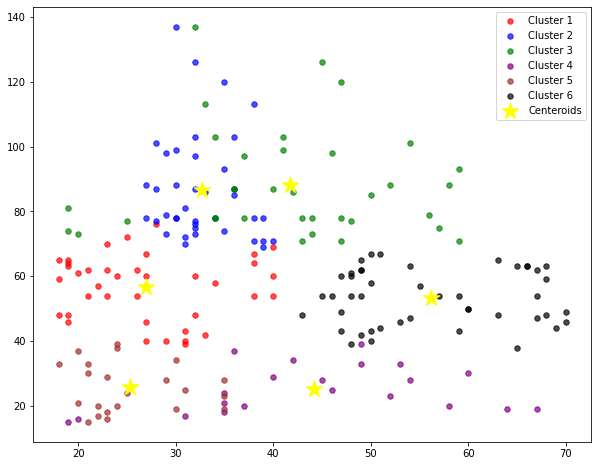

In [88]:
# Age dan Annual Income

plt.figure(figsize=(10,8))
plt.scatter(dataset.values[y_kmeans == 0, 0], dataset.values[y_kmeans == 0, 1],s=30, alpha=0.7, c='red', label ='Cluster 1')
plt.scatter(dataset.values[y_kmeans == 1, 0], dataset.values[y_kmeans == 1, 1],s=30, alpha=0.7, c='blue', label ='Cluster 2')
plt.scatter(dataset.values[y_kmeans == 2, 0], dataset.values[y_kmeans == 2, 1],s=30, alpha=0.7, c='green', label ='Cluster 3')
plt.scatter(dataset.values[y_kmeans == 3, 0], dataset.values[y_kmeans == 3, 1],s=30, alpha=0.7, c='purple', label ='Cluster 4')
plt.scatter(dataset.values[y_kmeans == 4, 0], dataset.values[y_kmeans == 4, 1],s=30, alpha=0.7, c='brown', label ='Cluster 5')
plt.scatter(dataset.values[y_kmeans == 5, 0], dataset.values[y_kmeans == 5, 1],s=30, alpha=0.7, c='black', label ='Cluster 6')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, marker='*', label = 'Centeroids', c='yellow')
plt.legend(loc='best')

#Dari gambar diatas, korelasi antara Age dan Annual Income sudah ideal, dapat dilihat dari titik yang menyebar secara jelas.

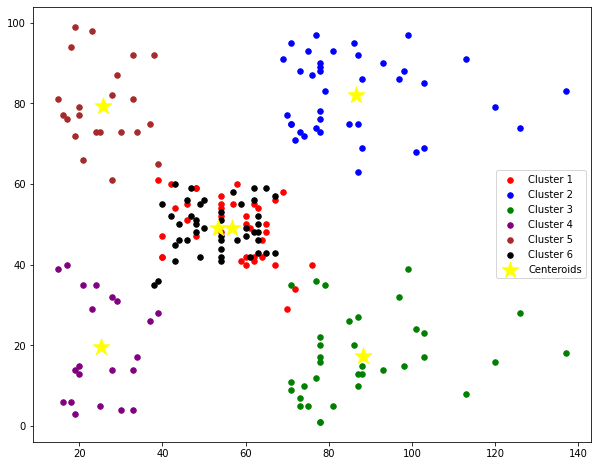

In [87]:
# Annual Income dan Spending Score

plt.figure(figsize=(10,8))
plt.scatter(dataset.values[y_kmeans == 0, 1], dataset.values[y_kmeans == 0, 2],s=30, c='red', label ='Cluster 1')
plt.scatter(dataset.values[y_kmeans == 1, 1], dataset.values[y_kmeans == 1, 2],s=30, c='blue', label ='Cluster 2')
plt.scatter(dataset.values[y_kmeans == 2, 1], dataset.values[y_kmeans == 2, 2],s=30, c='green', label ='Cluster 3')
plt.scatter(dataset.values[y_kmeans == 3, 1], dataset.values[y_kmeans == 3, 2],s=30, c='purple', label ='Cluster 4')
plt.scatter(dataset.values[y_kmeans == 4, 1], dataset.values[y_kmeans == 4, 2],s=30, c='brown', label ='Cluster 5')
plt.scatter(dataset.values[y_kmeans == 5, 1], dataset.values[y_kmeans == 5, 2],s=30, c='black', label ='Cluster 6')
plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], s=300, marker='*', label = 'Centeroids', c='yellow')
plt.legend(loc='best')

#Dari gambar diatas, korelasi antara Annual Income dan Spending Score tidak ideal, dikarenakan feature Cluster 1 dengan feature Cluster 6 menumpuk didalam 1 area yang sulit untuk di kelompokan.

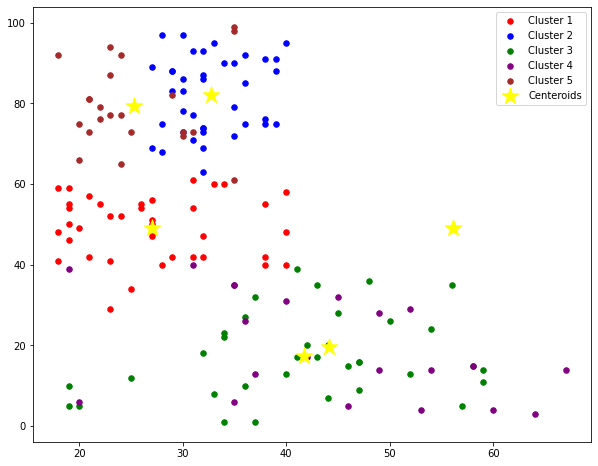

In [89]:
# Age dan Spending Score

plt.figure(figsize=(10,8))
plt.scatter(dataset.values[y_kmeans == 0, 0], dataset.values[y_kmeans == 0, 2],s=30, c='red', label ='Cluster 1')
plt.scatter(dataset.values[y_kmeans == 1, 0], dataset.values[y_kmeans == 1, 2],s=30, c='blue', label ='Cluster 2')
plt.scatter(dataset.values[y_kmeans == 2, 0], dataset.values[y_kmeans == 2, 2],s=30, c='green', label ='Cluster 3')
plt.scatter(dataset.values[y_kmeans == 3, 0], dataset.values[y_kmeans == 3, 2],s=30, c='purple', label ='Cluster 4')
plt.scatter(dataset.values[y_kmeans == 4, 0], dataset.values[y_kmeans == 4, 2],s=30, c='brown', label ='Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 2], s=300, marker='*', label = 'Centeroids', c='yellow')
plt.legend(loc='best')

#Dari gambar diatas, korelasi antara Age dan Spending Score tidaklah baik, dikarenakan feature cluster 3 dan feature cluster 4 berada di penyebaran yang sama sehingga sulit untuk di kelompokan.